# Plot for supplementary figure 6
Comparison of the proposed RF model, NextFlu substitution model, and RF (NextFlu-matched-params) model.

**Note**: Run this notebook after running notebooks "Fig2_performance_RF", "SuppFig6_part1_performance_NextFlu", and "SuppFig6_part2_performance_RF_NextFlu_matched_params".

## Imports and configuration for plotting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context(rc={"axes.labelsize":9,
                    "xtick.labelsize":8,
                    "ytick.labelsize":8,
                    "legend.fontsize":8,
                    "legend.title_fontsize":8})

## Read test scores and prepare data for plots

In [2]:
# test scores of proposed RF model
scores_rf = pd.read_csv("../results/Fig2_performance_RF/Fig2_performance_RF_testScores.csv")
scores_rf = scores_rf[['season', 'MAE']]
scores_rf['Model'] = "RF"

# test scores of NextFlu substitution model
scores_nextflu = pd.read_csv("../results/SuppFig6_comparison/SuppFig6a_testScores_NextFlu.csv")
scores_nextflu = scores_nextflu[['season', 'MAE']]
scores_nextflu['Model'] = "NextFlu"

# test scores of RF (NextFlu-matched-params) model
scores_matched = pd.read_csv("../results/SuppFig6_comparison/SuppFig6b_testScores_RF_NextFlu_matched_params.csv")
scores_matched = scores_matched[['season', 'MAE']]
scores_matched['Model'] = "RF\n(NextFlu-matched-params)"


'''
Combine results and melt
'''
# combine results
scores = pd.concat((scores_rf, scores_nextflu, scores_matched), ignore_index=True)

# melt by variable MAE
scores = scores.melt(id_vars=['Model', 'season'], var_name=['MAE'])

# remove average MAE
scores = scores[scores.season != 'Average']

## Plot MAE of 3 models over boxplot varying over 14 test seasons

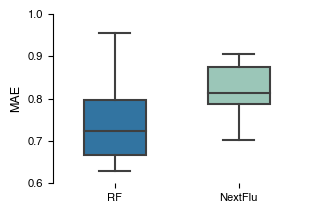

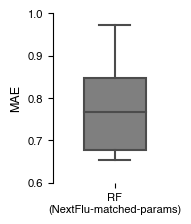

In [3]:
# for RF and NextFlu
fig, ax = plt.subplots(figsize=(3.2,2.2))

sns.boxplot(x='Model', y='value', data=scores,
            order=['RF', 'NextFlu'],
            palette=['C0', '#94CDBA'],
            width=0.5,
            ax=ax)

# configurations for figure
ax.set_ylim(bottom=0.6, top=1)
ax.set_xlabel("")
ax.set_ylabel("MAE", fontsize=9)

sns.despine(trim=True, bottom=True)

# save figure
fig_fn = '../results/SuppFig6_comparison/SuppFig6_performance_comparison.svg'
fig.savefig(fig_fn, format='svg', bbox_inches='tight')


# for RF (NextFlu-matched-params) model
fig, ax = plt.subplots(figsize=(1.6,2.2))

sns.boxplot(x='Model', y='value', data=scores,
            order=['RF\n(NextFlu-matched-params)'],
            palette=['C7'],
            width=0.5,
            ax=ax)

# configurations for figure
ax.set_ylim(bottom=0.6, top=1)
ax.set_xlabel("")
ax.set_ylabel("MAE", fontsize=9)

sns.despine(trim=True, bottom=True)

fig_fn = '../results/SuppFig6_comparison/SuppFig6_performance_comparison_RFNextFluMatched.svg'
fig.savefig(fig_fn, format='svg', bbox_inches='tight')